In [1]:
from keras import layers
from keras import models
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from itertools import cycle
from tensorflow.python.client import device_lib
import itertools
from keras import backend as K
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6048206380449247665
]


[]

In [2]:
def getTargetNames(validation_generator):
    dictionary = validation_generator.class_indices
    result = []
    result_indexes = []
    for x in dictionary:
        #print(x)
        result.append(x)
        result_indexes.append(dictionary[x])
    return result, result_indexes

In [12]:
#train_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/train"
#validation_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/validation"
test_dir = "C:/Users/Canpolat/Documents/Uni/masterthesis/voter_Entwurf/Tomaten_Voter/test"
#test_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/test"

# Rescales all images by 1/255
#rain_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
#validation_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


#train_generator = train_datagen.flow_from_directory(
#    train_dir, # Target directory
#    target_size=(150, 150), #Resizes all images to 150 × 150
#    batch_size=32,
#    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


#validation_generator = validation_datagen.flow_from_directory(
#    validation_dir,
#    target_size=(150, 150),
#    batch_size=32,
#    class_mode='categorical',
#    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

print(test_generator.class_indices)
#target_names, target_index = getTargetNames(validation_generator)

Found 256 images belonging to 3 classes.
{'Early_blight': 0, 'Late_blight': 1, 'healthy': 2}


In [13]:
#######Experiermentier Voter1
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
#model.add(layers.Dense(256, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(3, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 256)       295168    
__________

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('C:/Users/Ilker/Desktop/best_model_voter1.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=43,
    callbacks = [es, mc])

Epoch 1/35
230/230 [==============================] - 72s 311ms/step - loss: 0.7905 - acc: 0.6701 - val_loss: 0.7113 - val_acc: 0.7500

Epoch 00001: val_loss improved from inf to 0.71133, saving model to C:/Users/Ilker/Desktop/best_model_voter1.h5
Epoch 2/35
230/230 [==============================] - 56s 243ms/step - loss: 0.4285 - acc: 0.8381 - val_loss: 0.4478 - val_acc: 0.8260

Epoch 00002: val_loss improved from 0.71133 to 0.44782, saving model to C:/Users/Ilker/Desktop/best_model_voter1.h5
Epoch 3/35
230/230 [==============================] - 56s 245ms/step - loss: 0.3548 - acc: 0.8792 - val_loss: 0.3414 - val_acc: 0.8826

Epoch 00003: val_loss improved from 0.44782 to 0.34139, saving model to C:/Users/Ilker/Desktop/best_model_voter1.h5
Epoch 4/35
230/230 [==============================] - 56s 245ms/step - loss: 0.3336 - acc: 0.8821 - val_loss: 0.3492 - val_acc: 0.8632

Epoch 00004: val_loss did not improve from 0.34139
Epoch 5/35
230/230 [==============================] - 56s 245

In [ ]:
model.save("C:/Users/Ilker/Desktop/dataset/model.h5")

In [4]:
from keras.models import load_model
model = load_model("C:/Users/Canpolat/Documents/Uni/masterthesis/voter_Entwurf/best_model_voter1.h5")

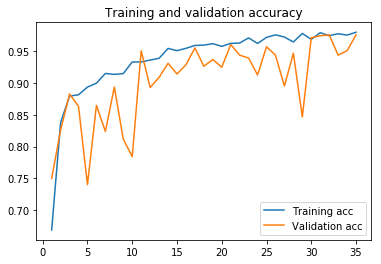

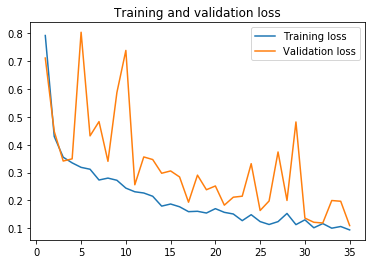

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

[[ 56   4   0]
 [  2 107   0]
 [  0   0  87]]
Classification Report
              precision    recall  f1-score   support

Early_blight       0.97      0.93      0.95        60
 Late_blight       0.96      0.98      0.97       109
     healthy       1.00      1.00      1.00        87

    accuracy                           0.98       256
   macro avg       0.98      0.97      0.97       256
weighted avg       0.98      0.98      0.98       256



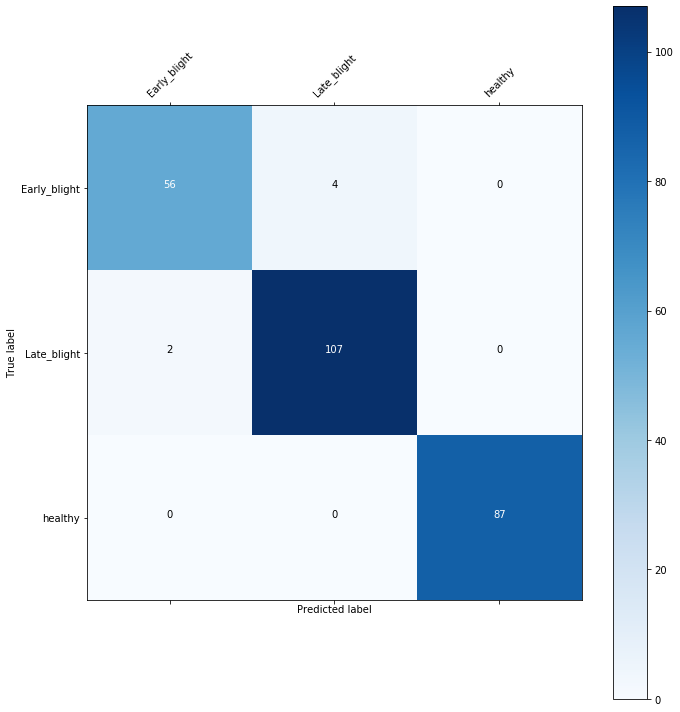

In [15]:
#num_of_test_samples = 2719 
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // 32+1)
#y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))

test_generator.reset()
names, index = getTargetNames(test_generator)
num_of_test_samples = 256#674#1072 #1619
steps=np.ceil(num_of_test_samples//32)
Y_pred = model.predict_generator(test_generator,steps=steps)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
confusion = confusion_matrix(test_generator.classes, y_pred, index)
print(confusion)

classes = range(3)

# create confusion matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
cmap=plt.cm.Blues
plt.imshow(confusion, interpolation='nearest', cmap=cmap)
#plt.title('confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.yticks(tick_marks, names)

thresh = confusion.max()/2
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, confusion[i, j], horizontalalignment='center', color='white' if confusion[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=names))